# 1. Handling categorical data

Most of the ML libraries are designed to work well with numerical variables. So categorical variables in their original form of text description can’t be directly used for model building. Let’s learn some of the common methods of handling categorical data based on their number of levels.

## Exercise 1: Create dummy variable
To create dummy variables, we can use either **OneHotEncoder** class of the scikit-learn library or the **get_dummies()** function from Pandas library. Main differences are :
- Output difference – **get_dummies()** results to a Pandas DataFrame whereas **OneHotEncoder** results a SciPy matrix.
- Time complexity – **get_dummies()** is much faster than the **OneHotEncoder**.

Analyze the following code. Then, run it and answer the questions.

In [1]:
import pandas as pd

df = pd.DataFrame({'A': ['high', 'medium', 'low']},
                  index = [0, 1, 2])
print(df)

        A
0    high
1  medium
2     low


In [2]:
df_with_dummies = pd.get_dummies(df, dtype = int)
print(df_with_dummies)

   A_high  A_low  A_medium
0       1      0         0
1       0      0         1
2       0      1         0


**Questions:**
1. Based on the example above, explain how the **get_dummies()** function works?
2. How many categorical levels (*k*) do we have?
3. How many dumny variables would be sufficient to represent all the categorical *k* levels? Justify your answer.

**Answers:**


1. Looking at the example, `get_dummies()` takes a column with categories and turns it into several new columns. Each new column represents one of the original categories. If a row had a certain category, the new column for that category gets a 1 in that row, and all the other new category columns get a 0. It's like creating a separate on/off switch for each category.

2. Based on the original data in the example (high, medium, low), we have 3 different categorical levels.

3. If we have *k* categorical levels, we actually only need *k-1* dummy variables to represent all of them. The reason is that if you know the values of *k-1* of the dummy variables, you can figure out what the last one must be. For instance, if you have categories A, B, and C, and you have dummy variables for A and B, if a data point isn't A (dummy A is 0) and isn't B (dummy B is 0), it *has* to be C. This helps avoid some potential issues when building models.

## Exercise 2: Convert categories to numeric labels
The **fit_transform(**) method of the LabelEncoder class transforms observations labels and returns encoded labels.

Analyze the following code. Then, run it and answer the questions.

In [5]:
df = pd.DataFrame({'A': ['b', 'b', 'a', 'a', 'a', 'c', 'c', 'd', 'd', 'd', 'd']},
                  index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(df)

    A
0   b
1   b
2   a
3   a
4   a
5   c
6   c
7   d
8   d
9   d
10  d


In [ ]:
from sklearn.preprocessing import LabelEncoder

df['A_pd_factorized'] = pd.factorize(df['A'])[0]
le = LabelEncoder()
df['A_LabelEncoded'] = le.fit_transform(df.A)
print(df)

   A  A_pd_factorized  A_LabelEncoded
0  b                0               1
1  b                0               1
2  a                1               0
3  a                1               0
4  a                1               0
5  a                1               0
6  a                1               0
7  c                2               2
8  c                2               2
9  d                3               3


**Questions:**


1. Change the number of individual letters *a*, *b*, *c*, *d* and explain what is a difference between the **factorize()** function and the **LabelEncoder** class?
2. What is a difference between the **get_dummies()** function and the **LabelEncoder** class?

**Answers:**


1. I changed the number of letters in the code cell above. Looking at the output, both `factorize()` and `LabelEncoder` convert the categories into numbers. However, `factorize()` seems to assign numbers based on the order it encounters the unique values ('b' becomes 0, 'a' becomes 1, 'c' becomes 2, 'd' becomes 3 in the original example), while `LabelEncoder` assigns numbers alphabetically ('a' becomes 0, 'b' becomes 1, 'c' becomes 2, 'd' becomes 3). So, the main difference is in how they order and assign the numerical labels.

2. `get_dummies()` creates new columns for each category, putting a 1 in the column that matches the category for that row and 0s elsewhere. This is good for when the order of categories doesn't matter. `LabelEncoder`, on the other hand, just assigns a single number to each category. This is useful when the categories have an inherent order or when you need a single numerical column.

# 2. Rescale data
Unit or scale of measurement for different variables varies, so an analysis with the raw measurement could be artificially skewed towards the variables with higher absolute values. Bringing the different types of variable units in the same order of magnitude eliminates the potential outlier measurements that would misrepresent the finding and negatively affect the accuracy of the conclusion. Two broadly used methods for rescaling data are normalization and standardization.

## Exercise 3: Normalization and standardization
Sklearn's **fit()** method calculates the parameters (e.g. mean and std. dev. in case of StandardScaler) and saves them as an internal object's state. Afterwards, we can call its **transform()** method to apply the transformation to any particular set of examples. **fit_transform()** method joins these 2 steps and is used for the initial fitting of parameters on the X training set, while also returning the transformed X′. Internally, the transformer object just calls first **fit()** and then **transform()** on the same data.

For X training set, we do **fit_transform()** because we need to compute mean and std. dev., and then use it to autoscale the data. For X test set, we already have the mean and std. dev., so we only do the **transform()** part.

Analyze the following code. Then, run it and answer the question.

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn import preprocessing

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]

minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)

print('Min value before min-max scaling: petal length = {:.1f}, petal width = {:.1f}'
      .format(X[:,0].min(), X[:,1].min()))
print('Max value before min-max scaling: petal length = {:.1f}, petal width = {:.1f}'
      .format(X[:,0].max(), X[:,1].max()))

print('\nMin value after min-max scaling: petal length = {:.1f}, petal width = {:.1f}'
      .format(X_minmax[:,0].min(), X_minmax[:,1].min()))
print('Max value after min-max scaling: petal length = {:.1f}, petal width = {:.1f}'
      .format(X_minmax[:,0].max(), X_minmax[:,1].max()))

Min value before min-max scaling: petal length = 1.0, petal width = 0.1
Max value before min-max scaling: petal length = 6.9, petal width = 2.5

Min value after min-max scaling: petal length = 0.0, petal width = 0.0
Max value after min-max scaling: petal length = 1.0, petal width = 1.0


In [ ]:
std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)

print('Mean before standardization: petal length = {:.1f}, petal width = {:.1f}'
      .format(X[:,0].mean(), X[:,1].mean()))
print('SD before standardization: petal length = {:.1f}, petal width = {:.1f}'
      .format(X[:,0].std(), X[:,1].std()))

print('\nMean after standardization: petal length = {:.1f}, petal width = {:.1f}'
      .format(X_std[:,0].mean(), X_std[:,1].mean()))
print('SD after standardization: petal length = {:.1f}, petal width = {:.1f}'
      .format(X_std[:,0].std(), X_std[:,1].std()))

Mean before standardization: petal length = 3.8, petal width = 1.2
SD before standardization: petal length = 1.8, petal width = 0.8

Mean after standardization: petal length = -0.0, petal width = -0.0
SD after standardization: petal length = 1.0, petal width = 1.0


**Question:**
1. What are the similarities and differences in the operation of normalization and standardization?
2. What is calculated by the fit() and transform() methods for normalization and standardisation?

**Answers:**


1. Both normalization and standardization serve to rescale data, which is beneficial for many machine learning algorithms. Their core similarity lies in preventing features with larger magnitudes from disproportionately influencing models compared to those with smaller values.

   The distinction is in their approach:
   *   **Normalization (Min-Max Scaling):** This method scales data to a fixed range, typically between 0 and 1, by using the minimum and maximum values of the feature. It's useful when a specific output range is required.
   *   **Standardization (Z-score normalization):** This scales data to have a mean of 0 and a standard deviation of 1. It's achieved by subtracting the mean and dividing by the standard deviation. This approach is generally more robust to outliers than normalization.

2. In both normalization and standardization, the `fit()` method calculates the necessary parameters from the data.

   *   For **Normalization** (`MinMaxScaler`), `fit()` determines the minimum and maximum values of the feature.
   *   For **Standardization** (`StandardScaler`), `fit()` computes the mean and standard deviation of the feature.

   The `transform()` method then applies the scaling using the parameters calculated during the `fit()` step. Normalization uses the min and max to map values to the specified range, while standardization uses the mean and standard deviation to transform data to a standard normal distribution. The `fit_transform()` method performs both steps sequentially.

# 3. Exploratory data analysis
Exploratory data analysis (EDA) is about understanding data by employing summarizing and visualizing techniques. At a high level, the EDA can be performed in two ways i.e., **univariate analysis** and **multivariate analysis**.
We will use the **Iris** dataset that comes as a part of the **scikit-learn** dataset package. It contains some datasets being very popular in the machine learning literature.

## Exercise 4: Load input data
Analyze the following code. Then, run it and answer the question.

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

**Question:**
1. What data structures are there in the **Iris** dataset?

**Answer:**


1. When you load the Iris dataset using `datasets.load_iris()`, it returns a Bunch object. This object is similar to a dictionary and contains several keys. Based on the output we saw, the main data structures within it are:

    *   `data`: A NumPy array containing the numerical features (sepal length, sepal width, petal length, petal width).
    *   `target`: A NumPy array containing the integer labels for the species (0, 1, 2).
    *   `feature_names`: A list of strings with the names of the features.
    *   `target_names`: A NumPy array of strings with the names of the species ('setosa', 'versicolor', 'virginica').
    *   `DESCR`: A string containing a description of the dataset.
    *   `filename`: A string with the name of the dataset file.
    *   `frame`: This is `None` in this case.

    So, mainly, we're working with NumPy arrays for the actual data and targets, and lists/arrays for the names, all contained within a Bunch object.

## Exercise 5: Prepare data for analysis
Analyze the following code. Then, run it and answer the questions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to dataframe
iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                    columns = iris['feature_names'] + ['species'])

# Remove spaces from column name
iris.columns = iris.columns.str.replace(' ', '')

# Replace the values with class labels
iris.species = np.where(iris.species == 0.0, 'setosa',
                        np.where(iris.species == 1.0, 'versicolor', 'virginica'))

# Information on the shape (dimension) of the data
print(iris.shape)

# Display of the selected data fragment
iris.head()

(150, 5)


,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Questions:**
1. What is the operation of the individual commands?
2. How should the result of the **iris.shape** command be interpreted?
3. What results are returned by the **head(10)** and **tail()** functions?

**Answers:**

1. Let's break down what's happening in that code block:
   *   `iris = pd.DataFrame(...)`: This line is taking the numerical data (`iris['data']`) and the target labels (`iris['target']`) from the loaded Iris dataset and combining them into a pandas DataFrame. It also uses the `feature_names` and adds 'species' for the column names.
   *   `iris.columns = iris.columns.str.replace(' ', '')`: This little command goes through all the column names in the DataFrame and removes any spaces. This makes it easier to work with the columns later on.
   *   `iris.species = np.where(...)`: This is replacing the numerical species labels (0, 1, 2) with the actual species names ('setosa', 'versicolor', 'virginica'). It's using `np.where` to do this conditionally based on the numerical value.
   *   `print(iris.shape)`: This simply prints out the dimensions of the DataFrame, telling you how many rows and columns it has.
   *   `iris.head()`: This displays the first 5 rows of the DataFrame, giving you a quick look at what the data looks like after all the transformations.

2. When you see the output of `iris.shape`, like `(150, 5)`, it's telling you the dimensions of your DataFrame. The first number, `150`, is the number of rows, which means there are 150 individual samples or observations in the dataset. The second number, `5`, is the number of columns, which means there are 5 pieces of information (features plus the species column) for each sample.

3.
   *   `head(10)` would show you the *first 10* rows of the DataFrame. By default, `head()` shows the first 5, but you can put a number in the parentheses like `head(10)` to see more.
   *   `tail()` would show you the *last 5* rows of the DataFrame. It's similar to `head()` but shows you the end of the data instead of the beginning.

## 3.1. Univariate analysis
Individual variables are analyzed in isolation to get a better understanding of them.

## Exercise 6: Summary statistics
Pandas provides the **describe()** function to create summary statistics in tabular format for all variables. These statistics are very useful for the numerical type of variables to understand any quality issues such as missing value and presence of outliers. The column **species** is categorical, so we can check the frequency distribution for each category. Analyze the following code. Then, run it and answer the question.

In [ ]:
print(iris.describe())
print()
print(iris['species'].value_counts())

       sepallength(cm)  sepalwidth(cm)  petallength(cm)  petalwidth(cm)
count       150.000000      150.000000       150.000000      150.000000
mean          5.843333        3.057333         3.758000        1.199333
std           0.828066        0.435866         1.765298        0.762238
min           4.300000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.300000
50%           5.800000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


**Question:**
1. What information can you obtain from the statistics displayed above?

**Answer:**




 The statistics give us a good snapshot of the data.

   For the numerical stuff (the sepal and petal measurements), the `describe()` output shows us things like the average (mean), the middle value (median, which is the 50% mark), how spread out the data is (standard deviation), and the smallest and largest values. This helps us get a feel for the distribution and if there are any really extreme values.

   For the 'species' column, `value_counts()` tells us how many times each species appears. In this case, it shows that we have exactly 50 of each type (setosa, versicolor, and virginica), which means the dataset is perfectly balanced in terms of species.

   Also, looking at the 'count' row in the `describe()` output, since it's 150 for all the numerical columns (which is the total number of rows), we can see there are no missing values in those columns.

## Exercise 7: Histograms and box plots
Pandas supports plotting functions to quick visualization on attributes. Analyze the following code. Then, run it and answer the questions.

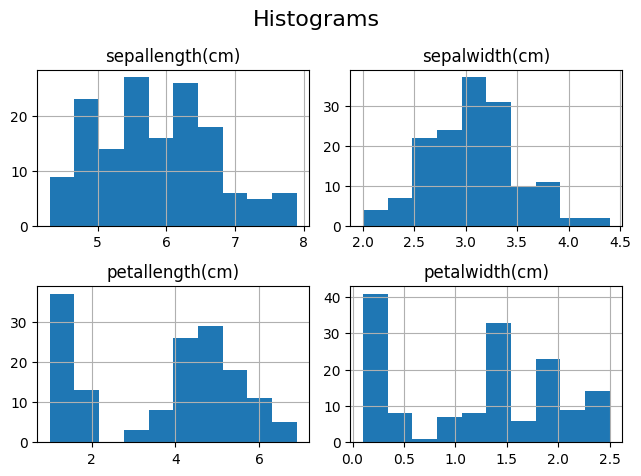

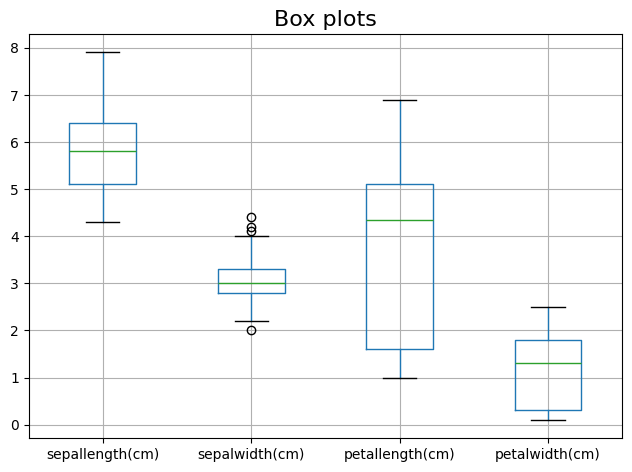

In [ ]:
# Histograms
iris.hist()
plt.suptitle('Histograms', fontsize = 16)
plt.tight_layout(pad = 1)
plt.show()

# Boxplots
iris.boxplot()
plt.title('Box plots', fontsize = 16)
plt.tight_layout(pad = 1)
plt.show()

**Questions:**
1. What conclusions can you draw from the observation of histograms?
2. What conclusions can you draw from the observation of boxplots?

**Answers:**


1. Looking at the histograms, we can get a sense of how the values for each measurement are spread out. For example, the petal length histogram seems to have two main bumps, suggesting there might be two groups of iris plants with different petal lengths. The sepal width looks more like a bell curve. Histograms are good for seeing the overall distribution and if the data is skewed or has multiple peaks.

2. The box plots give us a quick visual summary of the data's center, spread, and potential outliers for each measurement. The box itself shows where the middle 50% of the data falls (from the 25th to the 75th percentile), the line inside is the median, and the 'whiskers' extend to show the range of the rest of the data (excluding outliers). Any points shown individually beyond the whiskers are potential outliers. They're helpful for seeing the range and variability of each feature and spotting any unusual values.

## 3.2. Multivariate analysis
In multivariate analysis we try to estabilish a sense of relationship of all variables with one other.

## Exercise 8: Comparison of mean values for individual classes
Analyze the following code. Then, run it and answer the questions.

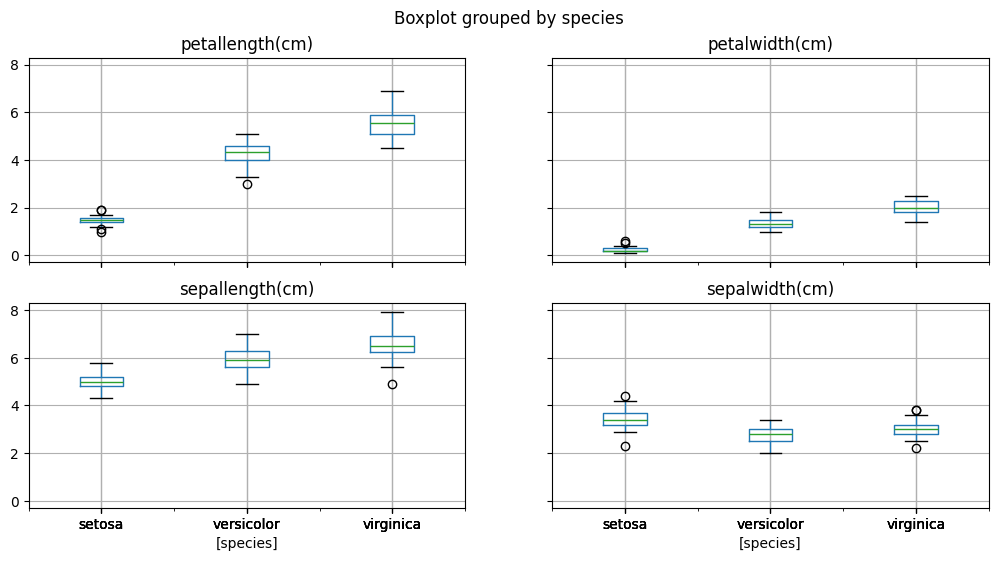

In [ ]:
# Boxplots split out by species
iris.boxplot(by = 'species', figsize = (12, 6))
plt.show()

In [ ]:
# Printing the mean for each column by species
iris.groupby(by = 'species').mean()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


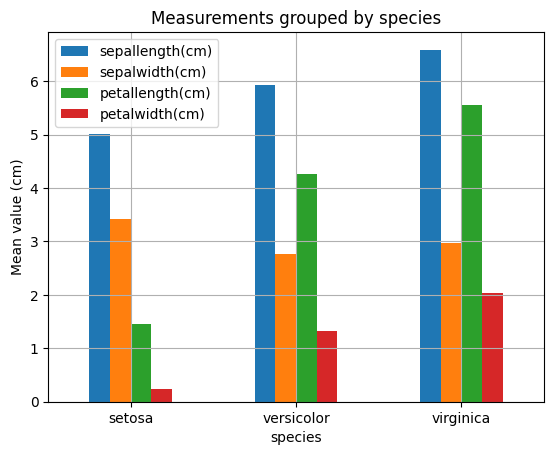

In [ ]:
# Barplots of mean values of individual features by class
iris.groupby(by = 'species').mean().plot(kind = 'bar')
plt.title('Measurements grouped by species')
plt.ylabel('Mean value (cm)')
plt.xticks(rotation = 0)
plt.legend(loc='upper left')
plt.grid(True)

**Questions:**
1. Based on the boxplots, what measurements do you think are more appropriate to distinguish between the different species and why?
2. Can you infer anything about the similarity between species from the last graph (**Measurements grouped by species**)? Justify your answer.

**Answers:**


1. Looking at the boxplots, the petal length and petal width measurements seem much better for telling the species apart than the sepal measurements. You can see that the boxes for petal length and petal width are pretty clearly separated for the different species. Setosa has much smaller petal length and width values compared to versicolor and virginica, and while versicolor and virginica overlap a bit, you can still see a general difference in their petal sizes. The sepal length and width boxplots overlap a lot more between species, making it harder to draw clear lines between them based on those measurements alone.

2. Yes, you can definitely get a sense of similarity from the bar plot of mean values. Just by looking at the heights of the bars for each species across the different measurements, you can see that setosa (the first set of bars) has significantly different mean values, especially for petal length and width, compared to versicolor and virginica. The bars for versicolor and virginica are closer to each other for most measurements, suggesting they are more similar to each other than either is to setosa. This aligns with what we saw in the boxplots too – setosa is quite distinct, while versicolor and virginica have more overlap and closer average measurements.

## Exercise 9: Correlation matrix
Correlation function uses **Pearson** correlation coefficient which results in a number between **-1** to **1**. **Strong negative** relationship is indicated by a coefficient towards **-1** and a **strong positive** correlation is indicated by a coefficient towards **1**. Analyze the following code. Then, run it and answer the question.

In [ ]:
corr = iris.corr(numeric_only = True)
print(corr)

                 sepallength(cm)  sepalwidth(cm)  petallength(cm)  \
sepallength(cm)         1.000000       -0.117570         0.871754   
sepalwidth(cm)         -0.117570        1.000000        -0.428440   
petallength(cm)         0.871754       -0.428440         1.000000   
petalwidth(cm)          0.817941       -0.366126         0.962865   

                 petalwidth(cm)  
sepallength(cm)        0.817941  
sepalwidth(cm)        -0.366126  
petallength(cm)        0.962865  
petalwidth(cm)         1.000000  


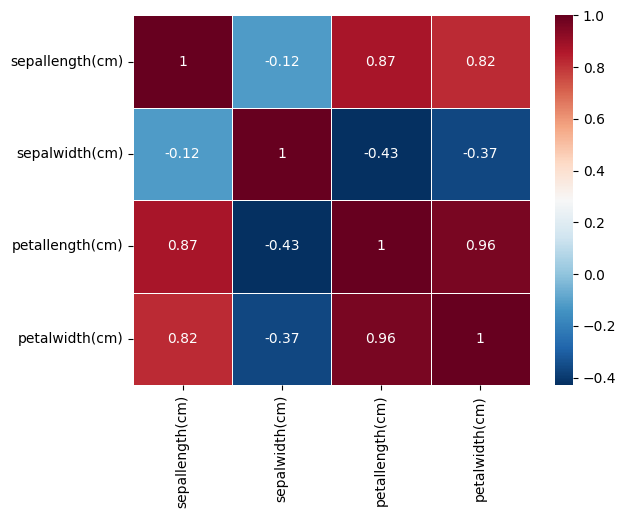

In [ ]:
import seaborn as sb
sb.heatmap(corr, xticklabels = list(corr.columns), yticklabels = list(corr.columns),
           cmap='RdBu_r', annot=True, linewidth=0.5)
plt.show()

**Question:**
1. Based on the results above, which features are strongly correlated and which are weak correlated? Give the numerical values.

**Answer:**


   **Strongly Correlated Features:**
   *   Petal Length and Petal Width: They have a very strong positive correlation of **0.96**. This means they increase and decrease together very closely.
   *   Petal Length and Sepal Length: These also have a strong positive correlation of **0.87**.
   *   Petal Width and Sepal Length: There's a strong positive correlation here too, at **0.82**.

   **Weakly Correlated Features:**
   *   Sepal Width and Sepal Length: These have a weak negative correlation of **-0.12**. There's almost no linear relationship between them.
   *   Sepal Width and Petal Length: There's a moderate negative correlation of **-0.43**. As sepal width increases, petal length tends to slightly decrease.
   *   Sepal Width and Petal Width: This pair has a moderate negative correlation of **-0.37**. As sepal width increases, petal width tends to slightly decrease.

## Exercise 10: Pair plot
Pair plots help us understand the relationship between attributes by looking at the distribution of the interactions of each pair of attributes. The **scatter_matrix()** function is used to create a matrix of scatter plots of all attributes against all attributes. Analyze the following code. Then, run it and answer the question.

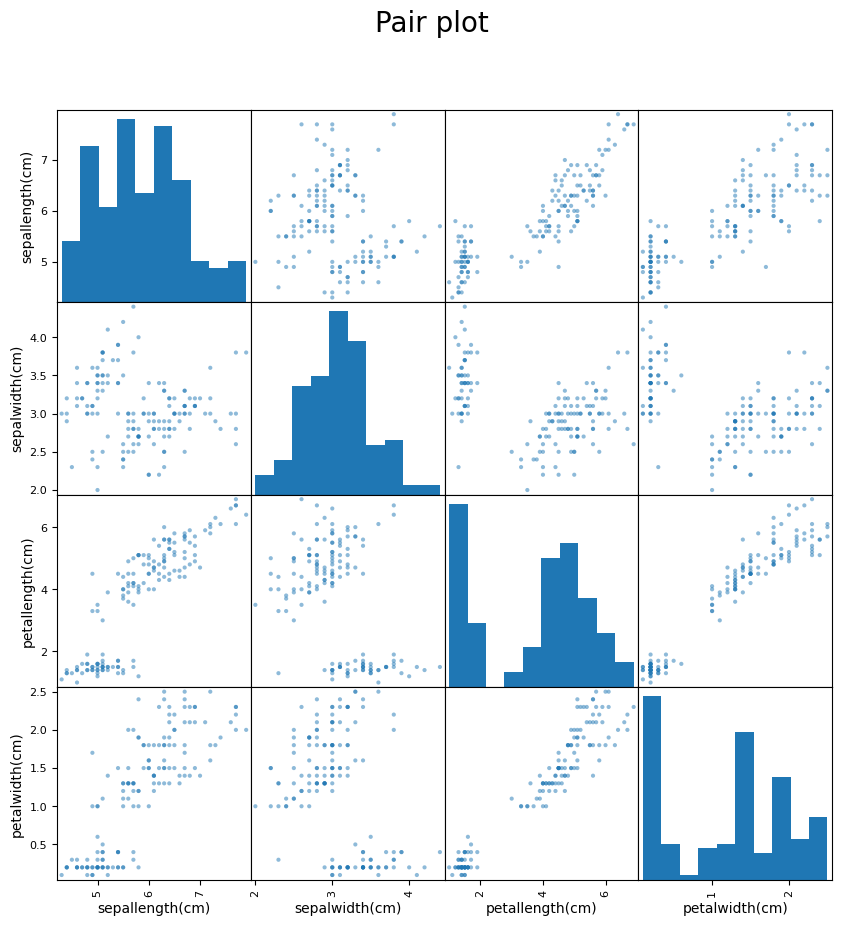

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris, figsize = (10, 10))
plt.suptitle('Pair plot', fontsize = 20)
plt.show()

**Question:**
1. Based on the plot above, which pairs of features do you think are more appropriate to distinguish between the different species and why?

**Answer:**


1. Looking at the scatter plots in the pair plot, the pairs of features that seem most useful for distinguishing between the different species are those involving **Petal Length** and **Petal Width**.

   You can see in the plots where Petal Length or Petal Width are on either the x or y-axis that the different species tend to form distinct clusters. For example, the scatter plot of Petal Length vs. Petal Width shows three fairly well-separated groups, corresponding to the three species. Setosa is clearly separated from the other two, and while there's some overlap between versicolor and virginica, they are still somewhat distinguishable based on these two features together.

   The plots involving Sepal Length and Sepal Width, on the other hand, show much more overlap between the species, making it harder to draw clear boundaries based on those pairs alone.

## Exercise 11: Findings of exploratory data analysis
**Based on the exercises you have done, answer the following questions:**
1. Are there missing values?
2. What is longer, sepal or petal? What is the range of the sepal and petal length changes and their average values?
3. What is wider, sepal or petal? What is the range of the sepal and petal width changes and their average values?
4. What is the average petal length and width of setosa compared to versicolor and virginica?
5. What is the correlation between the petal length and width?
6. What is the correlation between the petal length and sepal width?
7. What can you say about the similarity of different iris species based on length and width of sepal and petal?

**Answers:**

1. Based on the output of iris.describe(), the 'count' for all features is 150, which matches the total number of samples in the dataset. This indicates that there are no missing values in the Iris dataset.

2. Sepals are generally longer than petals.

    Sepal Length: Ranges from 4.3 cm to 7.9 cm, with an average of 5.84 cm.
    Petal Length: Ranges from 1.0 cm to 6.9 cm, with an average of 3.76 cm.

    Sepal vs. Petal Width: Sepals are generally wider than petals.

3. Sepals are also wider than petals. Sepal width varies between 2.0 cm and 4.4 cm, with an average of 3.06 cm. Petal width is smaller, ranging from 0.1 cm to 2.5 cm and averaging around 1.20 cm.

4. Setosa has the smallest petals, with an average length of 1.46 cm and width of 0.25 cm. Versicolor has bigger petals, averaging 4.26 cm in length and 1.33 cm in width. Virginica has the largest petals, with averages of 5.55 cm for length and 2.03 cm for width.

5. Petal length and width are super strongly correlated (0.96). This means if a flower has a long petal, it almost certainly has a wide petal too, and vice versa.

6. Petal length and sepal width have a moderate negative correlation (-0.43). This means that flowers with longer petals tend to have slightly narrower sepals, and flowers with shorter petals tend to have slightly wider sepals.

7. Looking at the size of sepals and petals, we can see some patterns. Setosa is pretty different from the other two – its petals are much smaller, and its sepals are a bit shorter on average. Versicolor and virginica are more alike, but virginica usually has larger petals than versicolor.
